In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/dataset.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [8]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

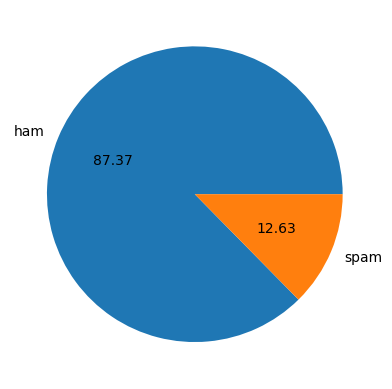

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [17]:
!pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

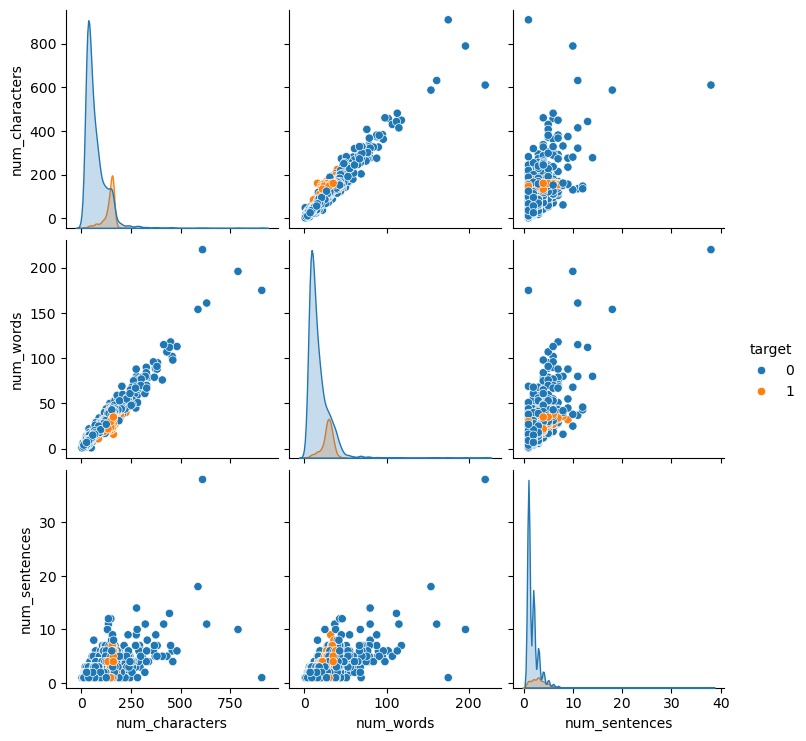

In [27]:
sns.pairplot(df, hue = 'target')

In [28]:
df.dtypes

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

<Axes: >

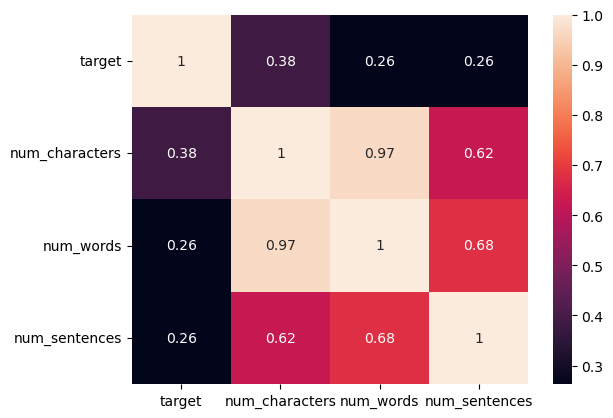

In [29]:
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True)


In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\AAYUSHMAAN
[nltk_data]     TAWER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for char in text:
        if char.isalnum():
            y.append(char)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
df['transformed_text'] = df['text'].apply(transform_text)

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width = 1500, height = 1500, min_font_size= 10, background_color='white')

In [35]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

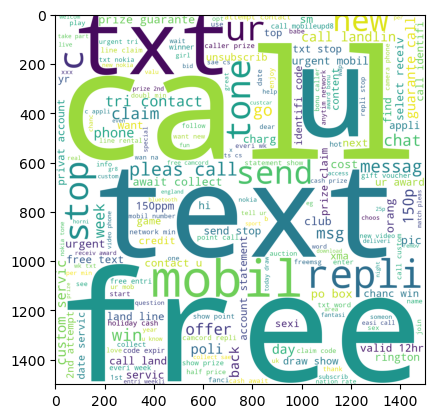

In [36]:
plt.imshow(spam_wc)

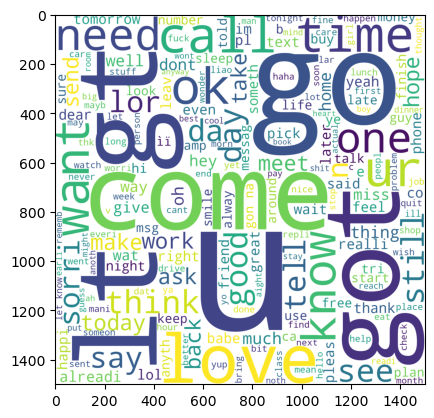

In [37]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))
plt.imshow(ham_wc)

In [38]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\AAYUSHMAAN TAWER\AppData\Local\Temp\ipykernel_17720\4934892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="viridis")


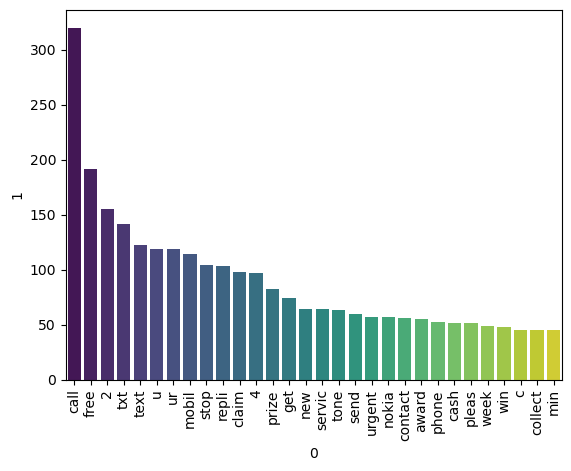

In [39]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1], palette="viridis")
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\AAYUSHMAAN TAWER\AppData\Local\Temp\ipykernel_17720\1549789114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="viridis")


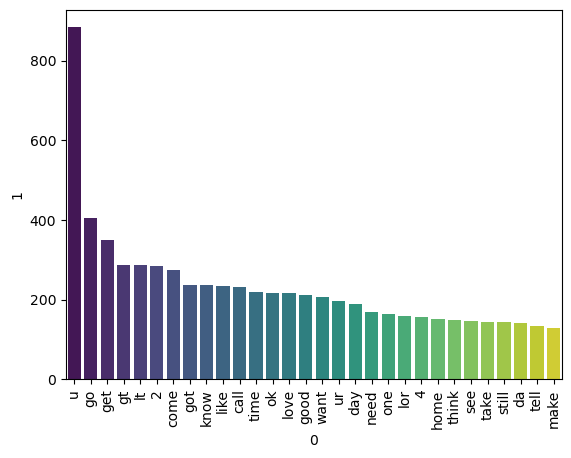

In [41]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1], palette="viridis")
plt.xticks(rotation = 'vertical')
plt.show()

In [108]:
#Model 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [120]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [121]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [122]:
X.shape

(5169, 6708)

In [123]:
y = df['target'].values

In [124]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, train_size=0.2)

In [126]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [127]:
gNB = GaussianNB()
mNB = MultinomialNB()
bNB = BernoulliNB()

In [128]:
#GaussianNB
gNB.fit(X_train, y_train)
y_pred1 = gNB.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred1)))
print("Confusion Matrix: " + str(confusion_matrix(y_test, y_pred1)))
print("Precision Score: " + str(precision_score(y_test, y_pred1)))

Accuracy Score: 0.8914410058027079
Confusion Matrix: [[3275  356]
 [  93  412]]
Precision Score: 0.5364583333333334


In [129]:
#MultinomialNB
mNB.fit(X_train, y_train)
y_pred2 = mNB.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred2)))
print("Confusion Matrix: " + str(confusion_matrix(y_test, y_pred2)))
print("Precision Score: " + str(precision_score(y_test, y_pred2)))

Accuracy Score: 0.9042553191489362
Confusion Matrix: [[3631    0]
 [ 396  109]]
Precision Score: 1.0


In [130]:
#BernoullNB
bNB.fit(X_train, y_train)
y_pred3 = bNB.predict(X_test)
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred3)))
print("Confusion Matrix: " + str(confusion_matrix(y_test, y_pred3)))
print("Precision Score: " + str(precision_score(y_test, y_pred3)))

Accuracy Score: 0.8870889748549323
Confusion Matrix: [[3629    2]
 [ 465   40]]
Precision Score: 0.9523809523809523


In [132]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mNB, open('model.pkl','wb'))